In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import 

In [90]:
def plot_decision_regions( X, y, classifier, test_idx = None, res = 0.02 ):

    colors = ("red", "green", "blue", "yellow", "orange", "pink")
    markers = ( "o", "v", "^", "s", "<" )
    cmap = ListedColormap( colors[: len( np.unique(y))] )

    x1_min, x1_max =  X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max =  X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, res ),
                            np.arange( x2_min, x2_max, res ))

    prdct = np.array( [xx1.ravel(), xx2.ravel()] ).T
    lab = classifier.predict( prdct )
    lab = lab.reshape( xx1.shape )

    plt.contour( xx1, xx2, lab, alpha = 0.3, cmap = cmap )
    plt.xlim( xx1.min(), xx1.max() )
    plt.ylim( xx2.min(), xx2.max() )

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x = X[ y == cl, 0],
                     y = X[ y == cl, 1],
                     alpha = 0.8,
                     c = colors[idx],
                     marker = markers[idx],
                     label = f"Class : {cl}",
                     edgecolor = "black")
        
    if test_idx:
        X_test, Y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

In [19]:
def entropy(p):
    return - p * np.log2( p ) - ( 1 - p ) * np.log2( 1 - p )

def gini(p):
    return p * ( 1 - p ) + ( 1 - p ) * ( 1 - ( 1 - p ) )

def error(p):
    return 1 - np.max( [p, 1-p] )

In [41]:
x = np.arange( 0.0, 1.0, 0.01 )
entrp = [ entropy(i) if ( i != 0 ) else None for i in x ]
sc_entrp = [ e*0.5 if e else None for e in entrp ]
gini = [ gini(i) for i in x ]
err = [ error(p) for p in x ]

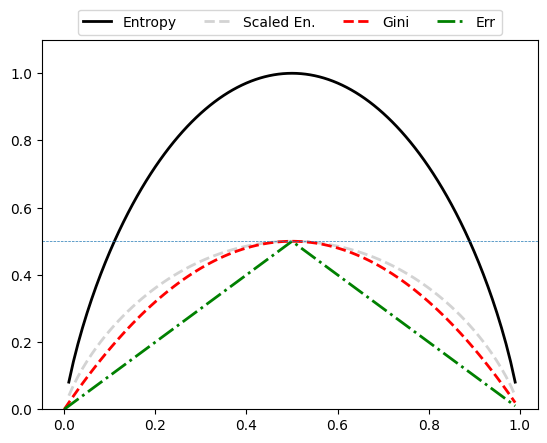

In [86]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip( [ entrp, sc_entrp, gini, err ], ["Entropy", "Scaled En.", "Gini", "Err"],
                         [ '-', '--', '--', '-.' ], ['black', 'lightgray','red', 'green', 'cyan'] ):
    line = ax.plot( x, i, label = lab, linestyle = ls, lw = 2, color=c )

ax.legend(fancybox = True, loc = "upper center", bbox_to_anchor = (0.5, 1.1), ncol = 5)
ax.axhline( y = 0.5, lw=0.5, ls = '--' )
plt.ylim( [0,1.1] )
plt.show()

In [88]:
import sklearn.datasets as datasets

In [91]:
from sklearn.tree import DecisionTreeClassifier 

In [89]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [92]:
tree = DecisionTreeClassifier()
tree.fit( X, y)

DecisionTreeClassifier()

In [93]:
plot_decision_regions( X, y, tree ) 

NameError: name 'ListedColormap' is not defined